In [ ]:
from torch_geometric.datasets import ModelNet
from torch_geometric.transforms import FaceToEdge
import networkx as nx
import matplotlib.pyplot as plt
# Correct path to download dataset from: Make sure to updata de url in ModelNet class
# http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip

In [4]:
ds = ModelNet(root='data/ModelNet10', name='10', train=True, transform=FaceToEdge(remove_faces=False))

Extracting data/ModelNet10/ModelNet10.zip
Processing...
Done!


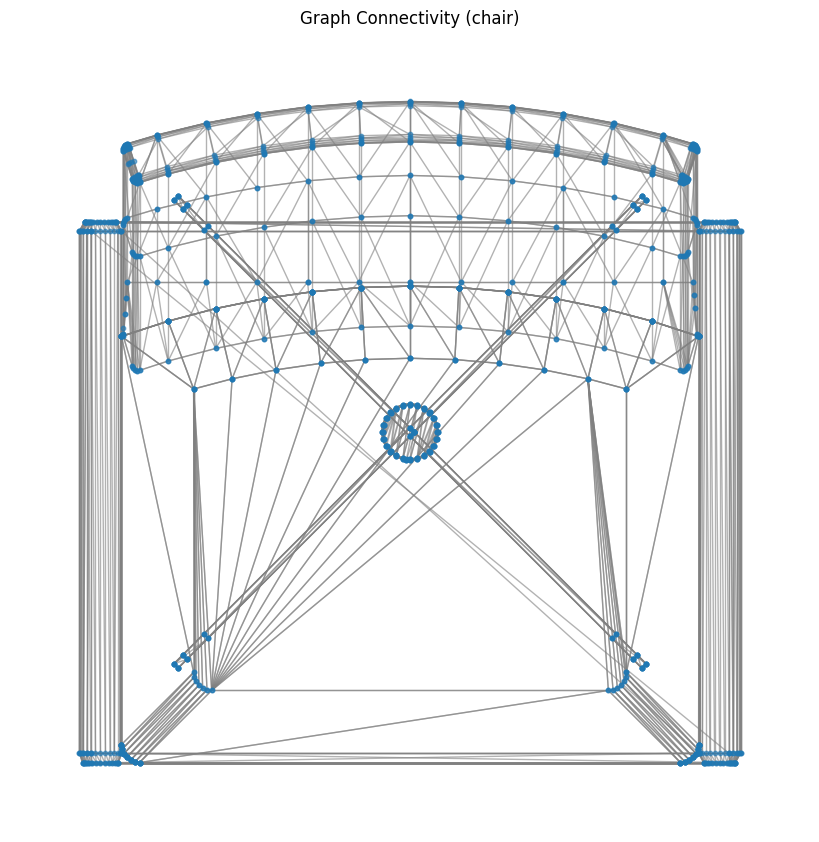

In [8]:
class_names = ['bathtub', 'bed', 'chair', 'desk', 'dresser', 'monitor', 'night_stand', 'sofa', 'table', 'toilet']
data = ds[1000]

G = nx.Graph()
edge_list = data.edge_index.t().tolist()
G.add_edges_from(edge_list)

pos_2d = data.pos[:, :2].numpy()
pos_dict = {i: pos_2d[i] for i in range(len(pos_2d))}

plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos_dict, node_size=10, edge_color='gray', alpha=0.6)
plt.title(f"Graph Connectivity ({class_names[data.y]})")
plt.show()